* Downloading Libraries

In [2]:
pip install sqlalchemy

In [3]:
pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


* Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import pymysql
from sqlalchemy import create_engine

## Downloading the Dataset from Kaggle

In [5]:
"""
upload the file that have the name & password. it's located in kaggle file
"""

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omaralsaadi","key":"526f2993f852806e5a9029e538eadcab"}'}

In [6]:
"""
to locate the directory
"""

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the Dataset

!kaggle datasets download -d nilesh2042/the-worlds-billionaires-by-forbes

In [13]:
# unzip the dataset

! unzip the-worlds-billionaires-by-forbes

Archive:  the-worlds-billionaires-by-forbes.zip
  inflating: forbes_dataset.csv      


In [15]:
ds = pd.read_csv("/content/forbes_dataset.csv")

## Data Overview

In [17]:
ds.head(10)

,Rank,Name,Net Worth,Change,Percentage Change,Age,Source,Country/Territory
0,1,Elon Musk,$405.6 B,$6.1 B,1.52%,54,"Tesla, SpaceX",United States
1,2,Larry Ellison,$290.6 B,$2.9 B,1.01%,80,Oracle,United States
2,3,Mark Zuckerberg,$245.9 B,$724 M,-0.29%,41,Facebook,United States
3,4,Jeff Bezos,$244.0 B,$715 M,-0.29%,61,Amazon,United States
4,5,Larry Page,$158.9 B,$734 M,0.46%,52,Google,United States
5,6,Sergey Brin,$151.7 B,$687 M,0.45%,51,Google,United States
6,7,Bernard Arnault & family,$151.7 B,$5.3 B,3.63%,76,LVMH,France
7,8,Jensen Huang,$151.0 B,$207 M,-0.14%,62,Semiconductors,United States
8,9,Warren Buffett,$144.6 B,$103 M,0.07%,94,Berkshire Hathaway,United States
9,10,Steve Ballmer,$144.3 B,$631 M,0.44%,69,Microsoft,United States


In [18]:
ds.shape

(1556, 8)

In [28]:
len(ds['Country/Territory'].unique())

66

In [29]:
len(ds['Country/Territory'])

1556

In [136]:
len(ds['Source'].unique())

631

In [109]:
ds['Country/Territory'].unique()

array(['United States', 'France', 'Spain', 'India', 'Mexico', 'Canada',
       'China', 'Germany', 'Japan', 'Austria', 'Hong Kong', 'Italy',
       'Switzerland', 'Brazil', 'Indonesia', 'Israel', 'Australia',
       'Chile', 'Russia', 'Nigeria', 'Cyprus', 'Czech Republic', 'Sweden',
       'United Kingdom', 'United Arab Emirates', 'Thailand',
       'Saudi Arabia', 'Netherlands', 'Singapore', 'Poland', 'Norway',
       'Denmark', 'South Africa', 'Taiwan', 'Malaysia', 'Colombia',
       'Belize', 'Philippines', 'Vietnam', 'South Korea', 'Ireland',
       'Egypt', 'Argentina', 'Belgium', 'New Zealand',
       'St. Kitts and Nevis', 'Eswatini (Swaziland)', 'Venezuela',
       'Ukraine', 'Greece', 'Kazakhstan', 'Portugal', 'Monaco', 'Georgia',
       'Turkey', 'Qatar', 'Finland', 'Hungary', 'Oman', 'Lebanon',
       'Guernsey', 'Algeria', 'Bulgaria', 'Peru', 'Estonia', 'Romania'],
      dtype=object)

### Data Manipulation

* Changing the data type of Net worth column

In [100]:
ds['Net Worth'].sample(4)

,Net Worth
340,$9.2 B
1181,$3.3 B
1097,$3.5 B
897,$4.4 B


In [127]:
step_1 = ds['Net Worth'].str.replace("$","")
ds['Net Worth'] = step_1.str.replace("B","").astype(float)

In [128]:
ds['Net Worth'].dtype

dtype('float64')

* Add the last name column to use in the charts

In [118]:
ds['last_name'] = ds['Name'].str.split().str[-1]

## Data Analysis

### The Omanis in the List

In [133]:
Omanis = ds[ds['Country/Territory'] == "Oman"]

In [134]:
Omanis

,Rank,Name,Net Worth,Change,Percentage Change,Age,Source,Country/Territory,last_name
1059,1074,P.N.C. Menon,3.6,$11 M,-0.30%,76,Real estate,Oman,Menon


### Top 5 Billionaires in the World

<BarContainer object of 5 artists>

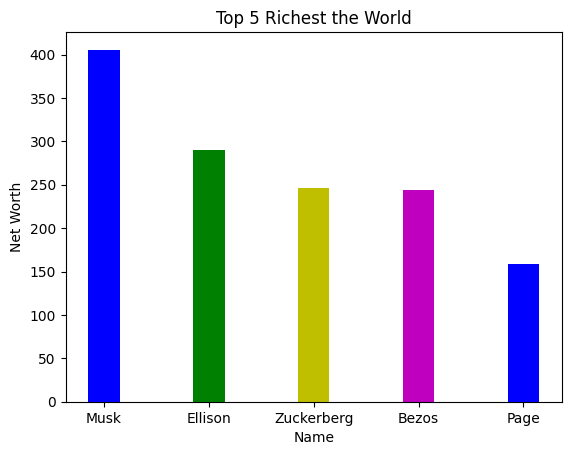

In [129]:
plt.xlabel("Name")
plt.ylabel("Net Worth")
plt.title("Top 5 Richest the World")
plt.bar(ds['last_name'][:5],ds['Net Worth'][:5], width=0.3, color= ["b","g","y","m"])

plt.savefig("Top_world.png", bbox_inches= "tight", pad_inches=0.1)

### Top 5 Richest in the Gulf

In [130]:
top_gulf = ds[(ds['Country/Territory'] == "Oman") |
   (ds['Country/Territory'] == "Saudi Arabia") |
   (ds['Country/Territory'] == "United Arab Emirates") |
   (ds['Country/Territory'] == "Qatar")]

In [131]:
top_gulf

,Rank,Name,Net Worth,Change,Percentage Change,Age,Source,Country/Territory,last_name
141,142,Pavel Durov,17.1,$0,0%,40,Messaging app,United Arab Emirates,Durov
154,155,Prince Alwaleed Bin Talal Alsaud,16.3,$0.77M,0.00%,70,investments,Saudi Arabia,Alsaud
290,294,Hussain Sajwani,10.2,$0M,0.00%,72,Real estate,United Arab Emirates,Sajwani
298,302,Sulaiman Al Habib,10.1,$0M,0.00%,73,Hospital group,Saudi Arabia,Habib
774,785,Hamad bin Jassim bin Jaber Al Thani,4.9,$51 M,-1.02%,65,Investments,Qatar,Thani
777,788,Abdulla Al Futtaim & family,4.9,$4 M,0.07%,85,"Auto dealers, investments",United Arab Emirates,family
782,793,Abdulla bin Ahmad Al Ghurair & family,4.9,$10 M,0.20%,96,Diversified,United Arab Emirates,family
1059,1074,P.N.C. Menon,3.6,$11 M,-0.30%,76,Real estate,Oman,Menon
1288,1306,Emad Al Muhaidib,3.0,$0M,0.00%,68,Diversified,Saudi Arabia,Muhaidib
1362,1380,Sulaiman Al Muhaidib,2.8,$0M,0.00%,70,Diversified,Saudi Arabia,Muhaidib


<BarContainer object of 5 artists>

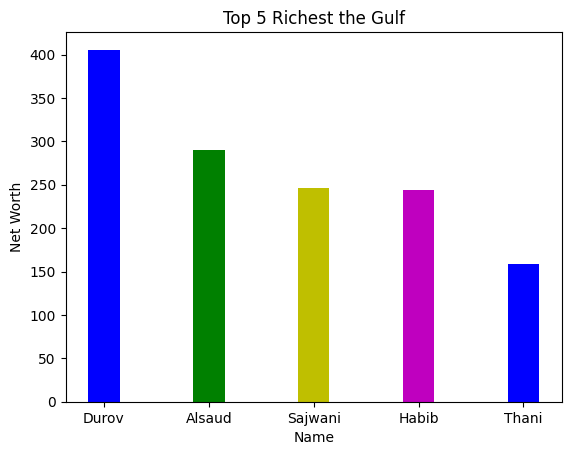

In [132]:
plt.xlabel("Name")
plt.ylabel("Net Worth")
plt.title("Top 5 Richest the Gulf")
plt.bar(top_gulf['last_name'][:5],ds['Net Worth'][:5], width=0.3, color= ["b","g","y","m"])

plt.savefig("Top_Gulf.png", bbox_inches= "tight", pad_inches=0.1)

### The Oldest & Youngest Billionaires

In [137]:
ds['Age'].dtype

dtype('int64')

In [142]:
max = ds['Age'].max()
min = ds['Age'].min()

In [143]:
ds[(ds['Age']== max) |
   (ds['Age']== min)]

,Rank,Name,Net Worth,Change,Percentage Change,Age,Source,Country/Territory,last_name
210,211,Robert Kuok,12.7,$27 M,-0.21%,101,"Palm oil, shipping, property",Malaysia,Kuok
638,644,Johannes von Baumbach,5.8,$0M,0.00%,20,Pharma,Germany,Baumbach


### Top Countries Involving Billionaires

In [56]:
country_counts = ds['Country/Territory'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

In [57]:
country_counts['Country'] = np.where(country_counts['Count'] > 50,
                                     country_counts['Country'], "Others")

In [58]:
country_counts.head(10)

,Country,Count
0,United States,540
1,China,175
2,India,115
3,Germany,99
4,Russia,53
5,Others,40
6,Others,39
7,Others,34
8,Others,34
9,Others,32


In [59]:
others_sum = country_counts[country_counts['Country'] == 'Others']['Count'].sum()

non_others = country_counts[country_counts['Country'] != 'Others']

In [60]:
others_row = pd.DataFrame([{'Country': 'Others', 'Count': others_sum}])

final_df = pd.concat([non_others, others_row], ignore_index=True)

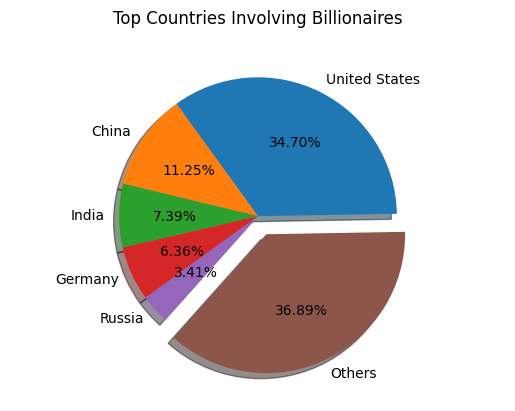

In [83]:
plt.axis("equal")
plt.pie(x=final_df['Count'], labels=final_df['Country'], radius= 0.7,
        autopct="%0.2f%%", shadow= True, startangle=1, explode=[0,0,0,0,0,0.1])
plt.title("Top Countries Involving Billionaires")
plt.savefig("piechart.png", bbox_inches= "tight", pad_inches=0.1)

#plt.show()